**IMPORTING REQUIRED LIBRARIES AND CSV DATA**

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
expn=pd.read_csv("/kaggle/input/CommBankExpenses.csv")
expn

**EXTRACTING EXACT TRANSACTION DATE FOR A PARTICULAR TRANSACTIONS AND TRANSFROMING THEM TO APPROPRIATE FORMAT**

In [181]:
def exactTransactionDate(d):
    if "Date: " in d:
        return d.split("Date: ")[-1]
    else:
        return "None"
expn["exd"]=expn["TRANSACTION_DONE_FOR"].apply(exactTransactionDate)
expn.loc[expn["exd"]=="None",["exd"]]=expn[expn["exd"]=="None"]["DATE"]
expn.drop(columns={"DATE"},inplace=True)
expn.rename(columns={"exd":"TRANSACTION_DATE","TRANSACTION_DONE_FOR":"TRANSACTION_NAME"},inplace=True)

In [182]:
expn["TRANSACTION_TYPE"]=expn["TRANSACTION_AMOUNT"].apply(lambda s:"+" if s>0 else "-")
expn["TRANSACTION_AMOUNT"]=expn["TRANSACTION_AMOUNT"].apply(lambda s:abs(s))

In [183]:
trans=expn[expn["TRANSACTION_TYPE"]=="-"]
d=[]
m=[]
y=[]
for j in trans["TRANSACTION_DATE"]:
    if "/" in j:
        d.append(j.split("/")[0])
        m.append(j.split("/")[1])
        y.append(j.split("/")[2])
    else:
        d.append(j.split("-")[0])
        m.append(j.split("-")[1])
        y.append(j.split("-")[2])
trans["TD"],trans["TM"],trans["TY"]=d,m,y

<ipython-input-183-5f9df541484e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
trans["TRANSACTION_DATE"]=trans["TD"]+"-"+trans["TM"]+"-"+trans["TY"]
trans[["TD","TM","TY"]]=trans[["TD","TM","TY"]].astype("int32")
trans=trans[(trans["TD"]>16) & (trans["TM"]==6)][["TRANSACTION_AMOUNT","TRANSACTION_NAME","TRANSACTION_DATE"]]

<ipython-input-184-beb820050876>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Angat\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**TRANSACTION NAME HERE MEANS FOR WHAT THE TRANSACTION WAS DONE FOR. SO WE ARE TRANSFORMING THEM TO MEANINGFUL FORMAT BY EXTRACTING THE NAMES**

In [185]:
trans["TRANSACTION_NAME"]=trans["TRANSACTION_NAME"].apply(lambda x:x.split("AU")[0])

In [186]:
trans

,TRANSACTION_AMOUNT,TRANSACTION_NAME,TRANSACTION_DATE
0,17.33,SQ *THE LIL DUMPLING Melbourne,29-06-2022
1,40.00,Vodafone Australia North Sydney,29-06-2022
2,32.38,Atiyah Streetfood Melbourne,29-06-2022
3,2.70,MELBOURNE VENDING CO TULLAMARINE,27-06-2022
4,19.55,SPICY N TASTE PTY LTD BUNDOORA,28-06-2022
5,20.00,MYKI PAYMENTS MELBOURNE,29-06-2022
6,2.70,MELBOURNE VENDING CO TULLAMARINE,26-06-2022
7,47.00,Sea Life Melbourne Melbourne,27-06-2022
8,6.50,COMPASS MELBOURNEZOO PARKVILLE,25-06-2022
9,34.30,AGORA IGA EXPRESS BUNDOORA VI,24-06-2022


**Total Expenses** 

In [187]:
print(f'The Total Expenditure For June Month Vaccation is $ {np.round(trans["TRANSACTION_AMOUNT"].sum(),2)}')
print(f'The Average Expenditure For June Month Vaccation is $ {np.round(trans["TRANSACTION_AMOUNT"].mean(),2)}')
print(f'The Max Expenditure For June Month Vaccation is $ {np.round(trans["TRANSACTION_AMOUNT"].max(),2)} For {trans[trans["TRANSACTION_AMOUNT"]==trans["TRANSACTION_AMOUNT"].max()]["TRANSACTION_NAME"].tolist()[0]}')
print(f'The Min Expenditure For June Month Vaccation is $ {np.round(trans["TRANSACTION_AMOUNT"].min(),2)} For {trans[trans["TRANSACTION_AMOUNT"]==trans["TRANSACTION_AMOUNT"].min()]["TRANSACTION_NAME"].tolist()[0]}')

The Total Expenditure For June Month Vaccation is $ 457.24
The Average Expenditure For June Month Vaccation is $ 20.78
The Max Expenditure For June Month Vaccation is $ 50.0 For MYKI PAYMENTS MELBOURNE 
The Min Expenditure For June Month Vaccation is $ 2.7 For MELBOURNE VENDING CO TULLAMARINE 


<AxesSubplot:xlabel='TRANSACTION_AMOUNT', ylabel='Count'>

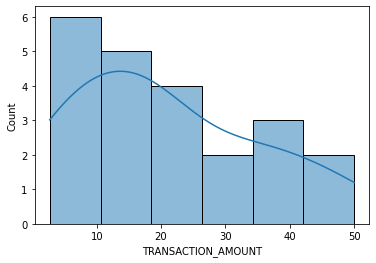

In [188]:
sns.histplot(x="TRANSACTION_AMOUNT",data=trans,kde=True)

The Majority of of the Transactions Are Below <b> \$ 20</b>

In [189]:
transAGG=np.round(trans.groupby(["TRANSACTION_DATE"])["TRANSACTION_AMOUNT"].agg({"sum","mean","median","max","min","count"}),2).reset_index().sort_values(["sum","mean","median","max","min","count"],ascending=False)
transAGG

,TRANSACTION_DATE,median,sum,mean,max,min,count
10,29-06-2022,26.19,109.71,27.43,40.00,17.33,4
2,19-06-2022,14.00,75.95,25.32,50.00,11.95,3
4,22-06-2022,11.50,51.69,12.92,21.69,7.00,4
8,27-06-2022,24.85,49.70,24.85,47.00,2.70,2
0,17-06-2022,20.78,41.55,20.78,38.85,2.70,2
6,25-06-2022,18.25,36.50,18.25,30.00,6.50,2
5,24-06-2022,34.30,34.30,34.30,34.30,34.30,1
3,21-06-2022,21.44,21.44,21.44,21.44,21.44,1
9,28-06-2022,19.55,19.55,19.55,19.55,19.55,1
1,18-06-2022,14.15,14.15,14.15,14.15,14.15,1


In [190]:
px.bar(transAGG,x="TRANSACTION_DATE",y=["sum","mean","median","max","min","count"],barmode="group")

From aboove we infer that We spent Max on <b>29th June</b> with Total and Average Of <b> \$ 109.71 </b> and <b> \$ 27.43 </b> And Max of <b> \$ 40 </b> Spent on Vodafone Netpack Recharge

In [191]:
transAGG=np.round(trans.groupby(["TRANSACTION_NAME"])["TRANSACTION_AMOUNT"].agg({"sum","mean","median","max","min","count"}),2).reset_index().sort_values(["sum","mean","median","max","min","count"],ascending=False)
transAGG

,TRANSACTION_NAME,median,sum,mean,max,min,count
0,AGORA IGA EXPRESS BUNDOORA VI,27.99,108.99,27.25,38.85,14.15,4
8,MYKI PAYMENTS MELBOURNE,35.00,70.00,35.00,50.00,20.00,2
13,Sea Life Melbourne Melbourne,47.00,47.00,47.00,47.00,47.00,1
15,Vodafone Australia North Sydney,40.00,40.00,40.00,40.00,40.00,1
1,Atiyah Streetfood Melbourne,32.38,32.38,32.38,32.38,32.38,1
9,Melbourne Zoo Parkville,30.00,30.00,30.00,30.00,30.00,1
14,UBER *EATS Sydney,21.44,21.44,21.44,21.44,21.44,1
11,SPICY N TASTE PTY LTD BUNDOORA,19.55,19.55,19.55,19.55,19.55,1
12,SQ *THE LIL DUMPLING Melbourne,17.33,17.33,17.33,17.33,17.33,1
7,MUSEUM VICTORIA ADMISS CARLTON,15.00,15.00,15.00,15.00,15.00,1


In [192]:
px.bar(transAGG,x="TRANSACTION_NAME",y=["sum","mean","median","max","min","count"],barmode="group")

From aboove we see that We Spent Max In Agogra With Total of  <b>108.99 dollars</b> rounding to <b>109 dollars</b> and Average of <b>27.25 dollars</b> and Max of <b>38.85 dollars</b> On <b>17th June</b>

- EXTRAS, THIS ISNT OF MUCH OF USEFUL INSIGHT BUT DEPENING ON SITUATIONS IT CAN BE IMP.
- LETS LOOK AT THE NAME AND DATE HAVING MAX COUNT OF TRANSACTION DONE 

<AxesSubplot:xlabel='TRANSACTION_DATE'>

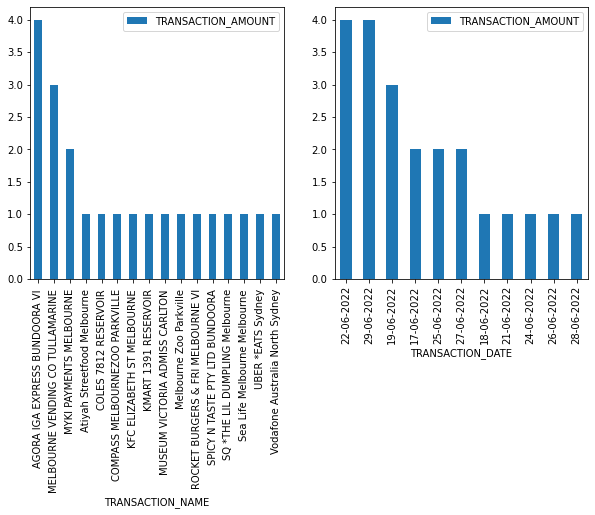

In [193]:
transAGG=trans.groupby(["TRANSACTION_NAME"])["TRANSACTION_AMOUNT"].count().reset_index().sort_values(["TRANSACTION_AMOUNT"],ascending=False)
transAGGS=trans.groupby(["TRANSACTION_DATE"])["TRANSACTION_AMOUNT"].count().reset_index().sort_values(["TRANSACTION_AMOUNT"],ascending=False)
transAGG.plot(x="TRANSACTION_NAME",kind="bar",ax=plt.subplot(121),figsize=(10,5))
transAGGS.plot(x="TRANSACTION_DATE",kind="bar",ax=plt.subplot(122),figsize=(10,5))

- From above we Infer That
    - We Made Maximum transactions in IGA Agora
    - We Made Maximum Transaction On 22nd and 29th June